In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import layers
from keras.utils.vis_utils import plot_model 
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

#Работа с датафреймом

In [2]:
dataframe = pd.read_csv('contraceptive_method_choice_preprocessed.csv')
dataframe.head()

Wife's age  Wife's education  ...  Media exposure  Contraceptive method used
0          24                 2  ...               0                          1
1          45                 1  ...               0                          1
2          43                 2  ...               0                          1
3          42                 3  ...               0                          1
4          36                 3  ...               0                          1

[5 rows x 10 columns]

In [3]:
X = dataframe.drop('Contraceptive method used',1)

In [4]:
y = dataframe['Contraceptive method used']
y = keras.utils.to_categorical(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [6]:
y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [7]:
y_test

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [6]:
X_test = X_test.values
X_train = X_train.values

In [9]:
X_test.shape

(369, 9)

#Работа с моделями

##1

In [60]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(5, input_dim=9,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 50        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 24        
Total params: 164
Trainable params: 164
Non-trainable params: 0
_________________________________________________________________
None


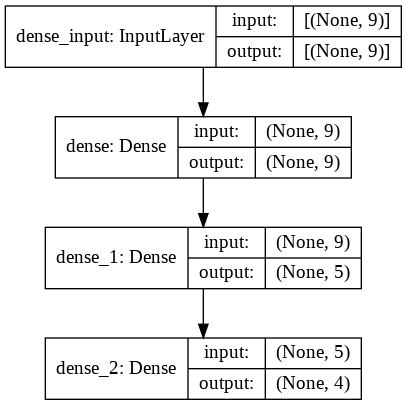

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
X_train.shape

(1104, 9)

In [ ]:
y_train.shape

(1104, 4)

In [ ]:
history = model.fit(X_train, y_train, epochs=75, batch_size=10, verbose=1)

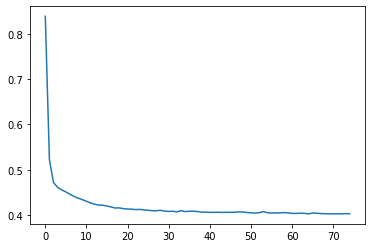

In [62]:
plt.plot(history.history['loss'])
plt.show()

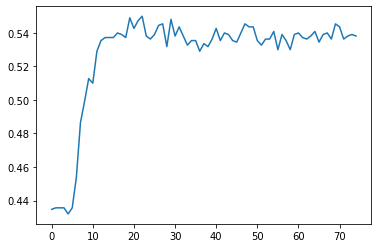

In [63]:
plt.plot(history.history['accuracy'])
plt.show()

In [64]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.5095
Accuracy: 50.95


##2

In [55]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 40        
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________
None


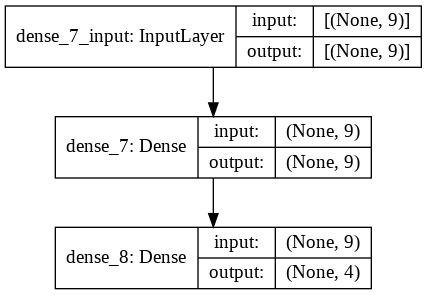

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=1)

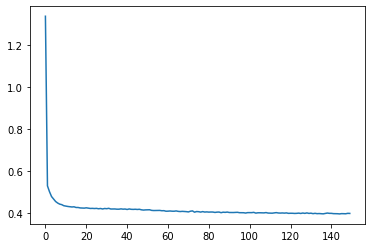

In [57]:
plt.plot(history.history['loss'])
plt.show()

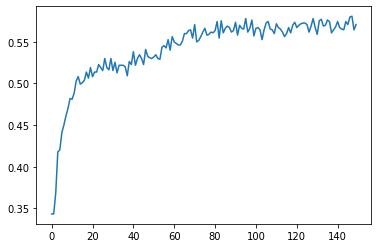

In [58]:
plt.plot(history.history['accuracy'])
plt.show()

In [59]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.5312
Accuracy: 53.12


##3

In [48]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(81, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=50,  activation= 'relu'))
model.add(Dense(200, input_dim=90,  activation= 'relu'))
model.add(Dense(300, input_dim=150,  activation= 'relu'))
model.add(Dense(400, input_dim=300,  activation= 'relu'))
model.add(Dense(350, input_dim=400,  activation= 'relu'))
model.add(Dense(300, input_dim=340,  activation= 'relu'))
model.add(Dense(250, input_dim=250,  activation= 'relu'))
model.add(Dense(150, input_dim=250,  activation= 'relu'))
model.add(Dense(8, input_dim=75,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_19 (Dense)             (None, 81)                810       
_________________________________________________________________
dense_20 (Dense)             (None, 100)               8200      
_________________________________________________________________
dense_21 (Dense)             (None, 200)               20200     
_________________________________________________________________
dense_22 (Dense)             (None, 300)               60300     
_________________________________________________________________
dense_23 (Dense)             (None, 400)               120400    
_________________________________________________________________
dense_24 (Dense)             (None, 350)              

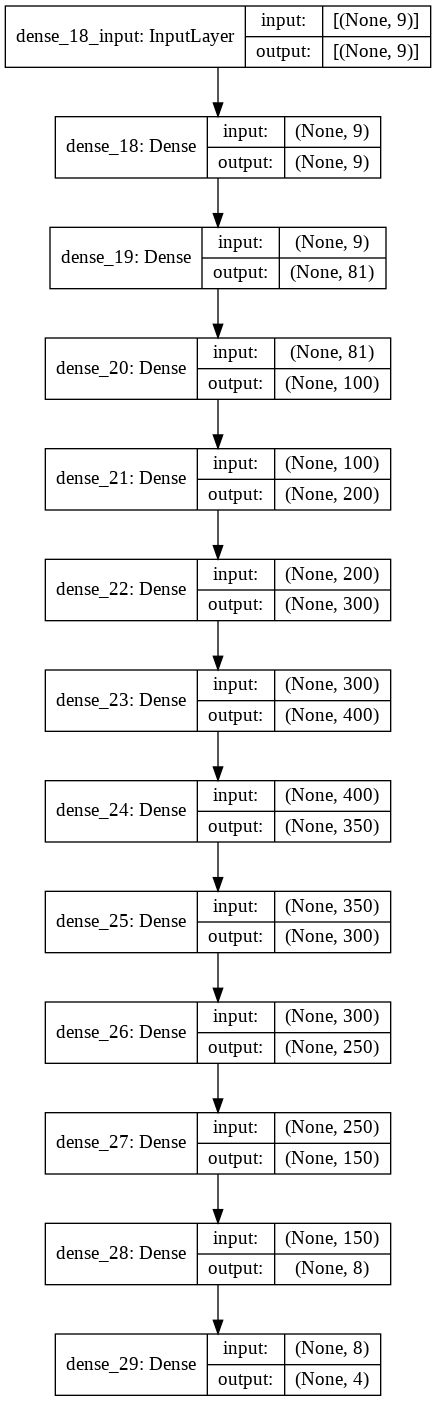

In [50]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

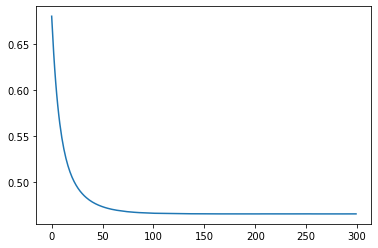

In [52]:
plt.plot(history.history['loss'])
plt.show()

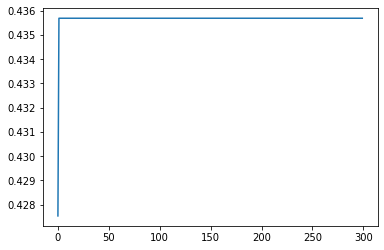

In [53]:
plt.plot(history.history['accuracy'])
plt.show()

In [54]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.4011
Accuracy: 40.11


##4

In [41]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=100,  activation= 'relu'))
model.add(Dense(80, input_dim=100,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_14 (Dense)             (None, 100)               1000      
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 324       
Total params: 19,594
Trainable params: 19,594
Non-trainable params: 0
_________________________________________________________________
None


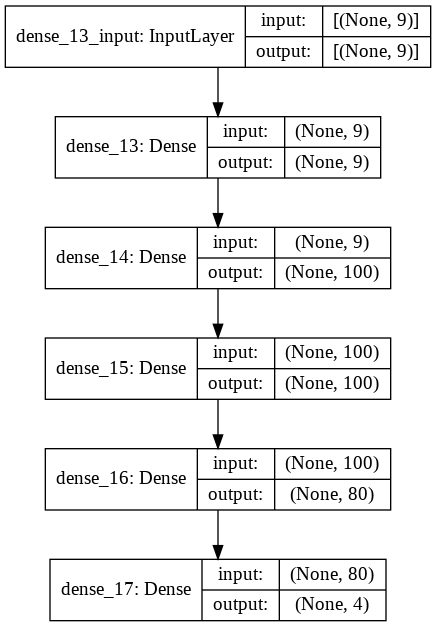

In [43]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [44]:
history = model.fit(X_train, y_train, epochs=800, batch_size=10, verbose=1)

Epoch 1/800
111/111 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.3844
Epoch 2/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4716 - accuracy: 0.4294
Epoch 3/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4713 - accuracy: 0.4491
Epoch 4/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.4556
Epoch 5/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.4823
Epoch 6/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.5008
Epoch 7/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4374 - accuracy: 0.5041
Epoch 8/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.4972
Epoch 9/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.5198
Epoch 10/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4330 - accura

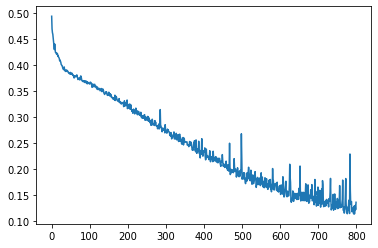

In [45]:
plt.plot(history.history['loss'])
plt.show()

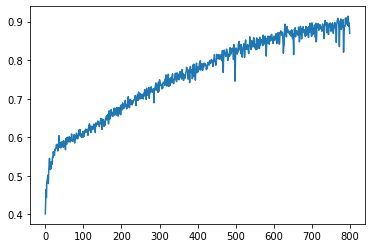

In [46]:
plt.plot(history.history['accuracy'])
plt.show()

In [47]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 3ms/step - loss: 1.4108 - accuracy: 0.4878
Accuracy: 48.78


##5

In [10]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=100,  activation= 'relu'))
model.add(Dense(90, input_dim=100,  activation= 'relu'))
model.add(Dense(80, input_dim=90,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 90        
_________________________________________________________________
dense_1 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 90)                9090      
_________________________________________________________________
dense_4 (Dense)              (None, 80)                7280      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 324       
Total params: 27,884
Trainable params: 27,884
Non-trainable params: 0
____________________________________________________

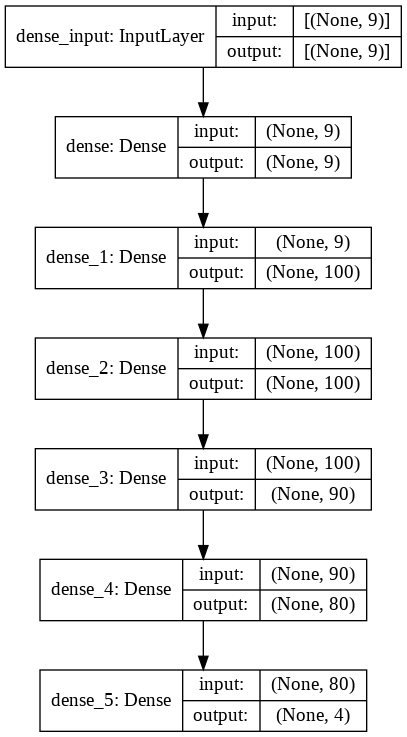

In [12]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
history = model.fit(X_train, y_train, epochs=800, batch_size=10, verbose=1)

Epoch 1/800
111/111 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.3960
Epoch 2/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.4652
Epoch 3/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4575 - accuracy: 0.4692
Epoch 4/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.4901
Epoch 5/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.5014
Epoch 6/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.4912
Epoch 7/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.5224
Epoch 8/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.5095
Epoch 9/800
111/111 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.5133
Epoch 10/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4267 - accura

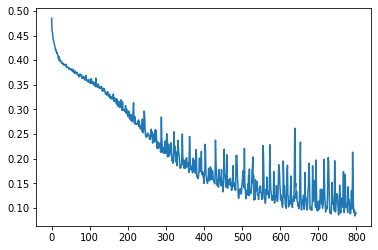

In [14]:
plt.plot(history.history['loss'])
plt.show()

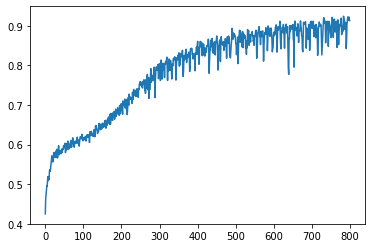

In [15]:
plt.plot(history.history['accuracy'])
plt.show()

In [33]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 1.7282 - accuracy: 0.4444
Accuracy: 44.44


##6

In [34]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(100, input_dim=9,  activation= 'relu'))
model.add(Dense(130, input_dim=100,  activation= 'relu'))
model.add(Dense(130, input_dim=130,  activation= 'relu'))
model.add(Dense(100, input_dim=130,  activation= 'relu'))
model.add(Dense(80, input_dim=100,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 9)                 90        
_________________________________________________________________
dense_7 (Dense)              (None, 100)               1000      
_________________________________________________________________
dense_8 (Dense)              (None, 130)               13130     
_________________________________________________________________
dense_9 (Dense)              (None, 130)               17030     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               13100     
_________________________________________________________________
dense_11 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_12 (Dense)             (None, 4)                

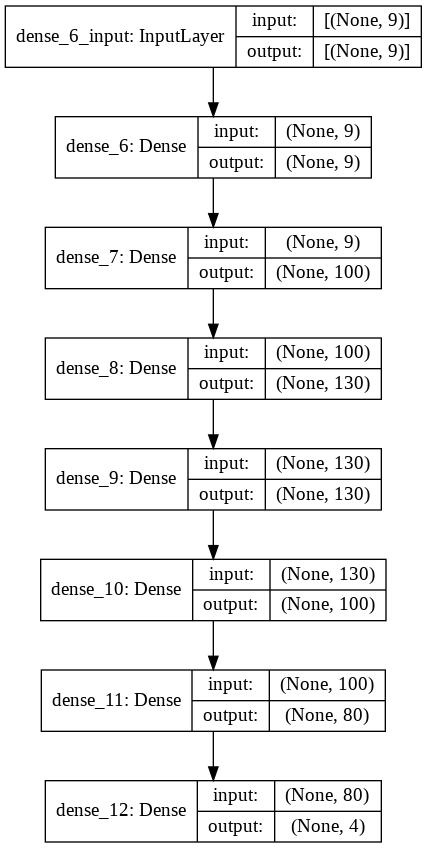

In [36]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
history = model.fit(X_train, y_train, epochs=800, batch_size=10, verbose=1)

Epoch 1/800
111/111 [==============================] - 1s 2ms/step - loss: 0.5074 - accuracy: 0.3720
Epoch 2/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.4354
Epoch 3/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.4993
Epoch 4/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4342 - accuracy: 0.4797
Epoch 5/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.4709
Epoch 6/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4186 - accuracy: 0.5203
Epoch 7/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.5363
Epoch 8/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.5588
Epoch 9/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4046 - accuracy: 0.5529
Epoch 10/800
111/111 [==============================] - 0s 2ms/step - loss: 0.4156 - accura

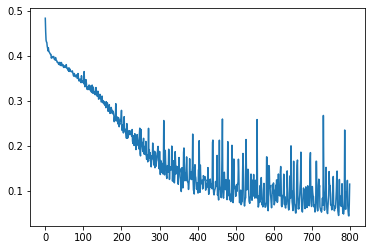

In [38]:
plt.plot(history.history['loss'])
plt.show()

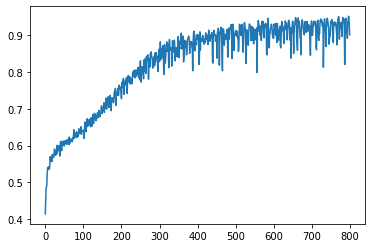

In [39]:
plt.plot(history.history['accuracy'])
plt.show()

In [40]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 1.5728 - accuracy: 0.4905
Accuracy: 49.05


##7

In [464]:
model = Sequential()
model.add(Dense(9, input_dim=9,  activation= 'relu'))
model.add(Dense(45, input_dim=9,  activation= 'relu'))
model.add(Dense(60, input_dim=45,  activation= 'relu'))
model.add(Dense(4, activation='sigmoid' ))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [465]:
print(model.summary())

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_242 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_243 (Dense)            (None, 45)                450       
_________________________________________________________________
dense_244 (Dense)            (None, 60)                2760      
_________________________________________________________________
dense_245 (Dense)            (None, 4)                 244       
Total params: 3,544
Trainable params: 3,544
Non-trainable params: 0
_________________________________________________________________
None


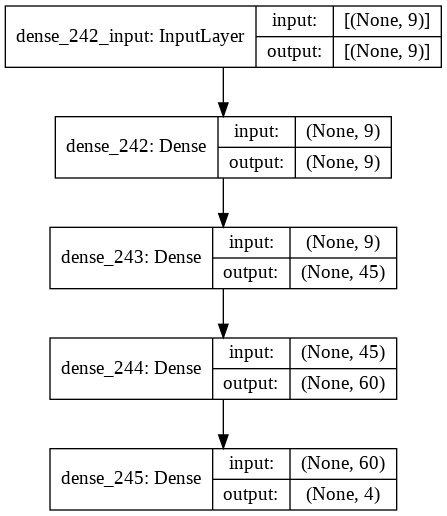

In [466]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [467]:
history = model.fit(X_train, y_train, epochs=40, batch_size=5, verbose=1)

Epoch 1/40
221/221 [==============================] - 1s 1ms/step - loss: 0.5270 - accuracy: 0.3871
Epoch 2/40
221/221 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.4207
Epoch 3/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.5174
Epoch 4/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4230 - accuracy: 0.5162
Epoch 5/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4193 - accuracy: 0.5246
Epoch 6/40
221/221 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.5375
Epoch 7/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.5588
Epoch 8/40
221/221 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.5874
Epoch 9/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.5676
Epoch 10/40
221/221 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.5468

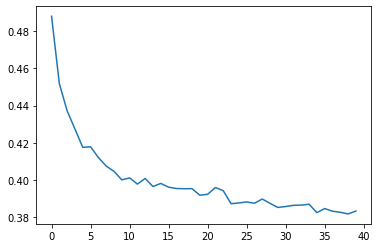

In [468]:
plt.plot(history.history['loss'])
plt.show()

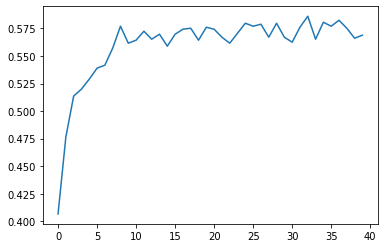

In [469]:
plt.plot(history.history['accuracy'])
plt.show()

In [463]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

12/12 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.5366
Accuracy: 53.66


#Сохранение

In [471]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


#Небольшой итог

На эту работу я потратил два дня. Но это не потому что я не понимаю, как работать в python с нейронной сетью, у меня просто не получилось в итоге подобрать гиперпараметры для неё. 

Что касаемо результатов. 94.8% точности я получил при обучении на тренировочных датасетах. Но с тестовыми всё намного хуже, максимальный результат, который удалось достичь - 55%, то есть почти половина, чуть больше. 

Скорость нейронных сетей намного меньше (но это тоже зависит от числа скрытых слоёв и нейронов в них), чем скорость тех методов, с которыми мы работали раньше. Я уверен, нейронкой можно получить намного лучше результат, но пока что он хуже, чем старыми методами, в частности наивный Б. метод показал себя лучше всех на этом датасете при классификации (с подбором параметров по сетке), выдав результат 68%. Когда я работал тогда с этими данными, я думал они сложные, а вот нейронки уж справятся, но у меня не получилось взять все их возможности. 

В этом ноутбуке представлены не все архитектуры, которые я пробовал, их гораздо больше, но я оставил лишь те, которые отличаются друг от друга по качеству или по архитектуре (не сильно близки по ней). 